# Project 3 - Data Pipelines
Este projeto consiste em realizar uma análise exploratória de um dataset.
O projeto foi realizado por Rafael Oliveira Sierra para o Bootcamp de Data Analytics da Ironhack (São Paulo - Sept2019).

# Objetivo
O objetivo deste projeto é realizar uma análise exploratória de uma dataset de nossa escolha. 
O dataset escolhido é sobre o preço de combustíveis no Brasil entre os anos de 2004 a 2019, retirados do Kaggle e feito por Matheus Eduardo Freitag (https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil). Os dados foram retirados do site da ANP (Agência Nacional do Petróleo).

# Importando bibliotecas

Primeiramente, importamos todas as bibliotecas necessária para a realização da análise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
#Usado para facilitar a visualização de gráficos criados com as bibliotecas "matplotlib" e "seaborn"
#Apesar de abandonado na última atualização da biblioteca, deixaremos no código por precaução

# Carregando o Dataset
Vamos carregar o dataset escolhido com a ajuda da biblioteca "Pandas" e transformá-lo em um dataframe para manipulação

In [3]:
combustivel = pd.read_csv("2004-2019.tsv", sep='\t',parse_dates=[1,2], index_col = [0])
#O código acima foi utilizado pois o arquivo "2004-2019.tsv" se encontra no mesmo diretório que este notebook.

In [4]:
combustivel.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


- O dataset foi carregado com sucesso e pode ser manipulado.
- "index_col = [0]" foi utilizado para que a coluna "Unnamed: 0" não seja chamada ao Dataframe.


# Data insights
Após carregar com êxito nosso dataframe, vamos checar suas informações para sabermos o quão completo ele se apresenta e se será necessário alguma limpeza ou modificação.

In [5]:
combustivel.shape

(106823, 20)

In [6]:
combustivel.columns.values

array(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA',
       'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA',
       'MARGEM MÉDIA REVENDA', 'COEF DE VARIAÇÃO REVENDA',
       'PREÇO MÉDIO DISTRIBUIÇÃO', 'DESVIO PADRÃO DISTRIBUIÇÃO',
       'PREÇO MÍNIMO DISTRIBUIÇÃO', 'PREÇO MÁXIMO DISTRIBUIÇÃO',
       'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'MÊS', 'ANO'], dtype=object)

In [7]:
combustivel["PRODUTO"].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

In [8]:
combustivel.axes

[Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             106813, 106814, 106815, 106816, 106817, 106818, 106819, 106820,
             106821, 106822],
            dtype='int64', length=106823),
 Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
        'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
        'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
        'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
        'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
        'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
        'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', 'MÊS',
        'ANO'],
       dtype='object')]

In [9]:
combustivel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
DATA INICIAL                     106823 non-null datetime64[ns]
DATA FINAL                       106823 non-null datetime64[ns]
REGIÃO                           106823 non-null object
ESTADO                           106823 non-null object
PRODUTO                          106823 non-null object
NÚMERO DE POSTOS PESQUISADOS     106823 non-null int64
UNIDADE DE MEDIDA                106823 non-null object
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PREÇO MÍNIMO REVENDA             106823 non-null float64
PREÇO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             106823 non-null object
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         106823 non-null object
DESVIO PADRÃO DISTRIBUIÇÃO       106823 non-null object
PREÇO MÍNIMO DISTRIBUIÇÃO    

- O dataframe que utilizaremos contém 106.823 linhas e 20 colunas;
- A partir das informações de "DataFrame.info()" vemos que todas as linhas contém valores, porém, ao observarmos os tipos de valores presentes nas colunas, notamos que colunas não contém caracteres numéricos (int64 ou float64);
- Para conseguirmos realizar a análise no dataset, teremos que modificar os tipo de caracter presentes em algumas colunas, quais sejam: MARGEM MÉDIA DE REVENDA, PREÇO MÉDIO DISTRIBUIÇÃO, DESVIO PADRÃO DISTRIBUIÇÃO, PREÇO MÍNIMO DISTRIBUIÇÃO, PREÇO MÁXIMO DISTRIBUIÇÃO e COEF DE VARIAÇÃO DISTRIBUIÇÃO.

# Data cleaning and wrangling

Como já explicado acima, encontramos um problema com algumas colunas do dataset. Tais colunas terão seus valores convertidos de "object" para "float64".

In [10]:
combustivel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
DATA INICIAL                     106823 non-null datetime64[ns]
DATA FINAL                       106823 non-null datetime64[ns]
REGIÃO                           106823 non-null object
ESTADO                           106823 non-null object
PRODUTO                          106823 non-null object
NÚMERO DE POSTOS PESQUISADOS     106823 non-null int64
UNIDADE DE MEDIDA                106823 non-null object
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PREÇO MÍNIMO REVENDA             106823 non-null float64
PREÇO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             106823 non-null object
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         106823 non-null object
DESVIO PADRÃO DISTRIBUIÇÃO       106823 non-null object
PREÇO MÍNIMO DISTRIBUIÇÃO    

- Ao checarmos as informações do dataframe, notames que algumas colunas com valores numéricos possuem o tipo "object" e não "int64" ou "float64".

In [11]:
for col in ["MARGEM MÉDIA REVENDA", "PREÇO MÉDIO DISTRIBUIÇÃO", "DESVIO PADRÃO DISTRIBUIÇÃO", "PREÇO MÍNIMO DISTRIBUIÇÃO", "PREÇO MÁXIMO DISTRIBUIÇÃO", "COEF DE VARIAÇÃO DISTRIBUIÇÃO"]:
    combustivel[col] = pd.to_numeric(combustivel[col], errors='coerce')
#"errors = 'corece'" foi utilizado para retornar "Nan" toda a vez que retornar um erro. 
#Error apareciam porque, apesar de todas as colunas estarem preenchidas, alguma continham valores que não podiam ser convertidos em caracteres numéricos
#Isto nos retornou algumas colunas com valores vazios, vamos checar o quão vazio está a coluna..


In [12]:
combustivel.isnull().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             3431
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         3400
DESVIO PADRÃO DISTRIBUIÇÃO       3400
PREÇO MÍNIMO DISTRIBUIÇÃO        3400
PREÇO MÁXIMO DISTRIBUIÇÃO        3400
COEF DE VARIAÇÃO DISTRIBUIÇÃO    3400
MÊS                                 0
ANO                                 0
dtype: int64

Agora temos um DataFrame bem limpo, mesmo com alguns valores nulos (que representam, aproximadamente 3% dos valores de cada coluna).
Assim, vamos arrumar o Dataframe.

In [13]:
combustivel["PRODUTO"].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

Primeiro, vamos eliminar o GLP. GLP é o gás resultante do refinamento do petróleo e tem uso doméstico para preparação de alimentos, não se encaixando no que queremos examinar

In [14]:
combustivel_GLP = combustivel[combustivel.PRODUTO != "GLP"]

Também iremos retirar o ano de 2019. Como a análise está sendo realizada no ano de 2019, ele será retirado para que tenhamos sempre uma visão sobre o ano inteiro.

In [15]:
combustivel = combustivel_GLP[combustivel_GLP.ANO != 2019]

In [16]:
combustivel.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


In [17]:
combustivel.to_csv('combustivel_EDA.csv')
#código usado para extrairmos o dataset criado neste notebook. 

# Análise Exploratória de Dados (EDA)
Após a limpeza e arrumação dos dados, vamos analisar o que estes dados podem nos dizer.
As perguntas que queremos responder é:
- qual combustível sofreu maior aumento?
- em quais macrorregiões cada produto é o mais caro e o mais barato?

# Preço médio de Revenda

- NACIONAL

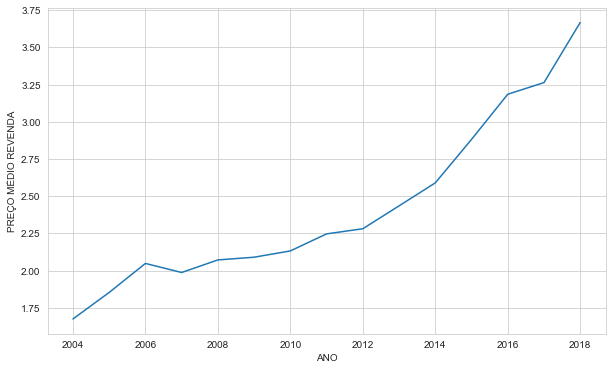

In [18]:
plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")
sns.lineplot(x="ANO", y="PREÇO MÉDIO REVENDA", ci = None, data=combustivel);

- POR MACRORREGIÃO

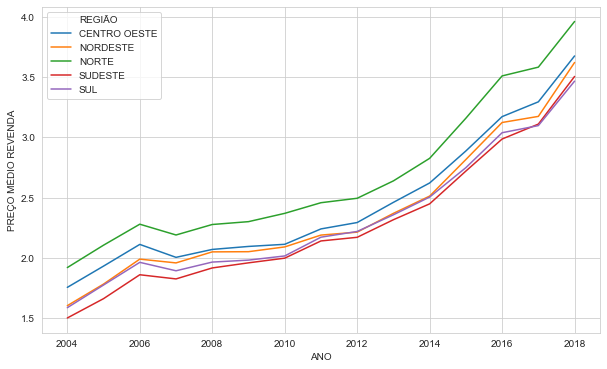

In [19]:
plt.figure(figsize = (10, 6))
sns.lineplot(x="ANO", y="PREÇO MÉDIO REVENDA", hue="REGIÃO", ci = None, data=combustivel);

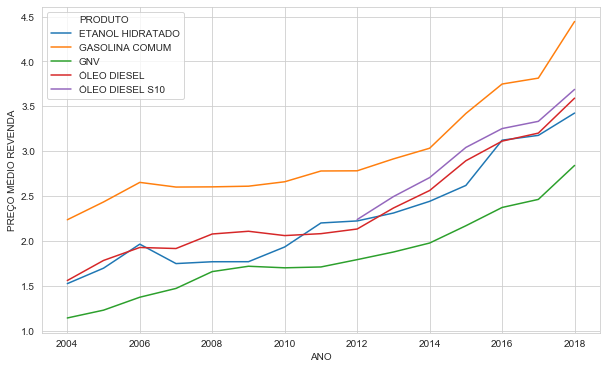

In [20]:
plt.figure(figsize = (10, 6))
sns.lineplot(x="ANO", y="PREÇO MÉDIO REVENDA", hue="PRODUTO", ci = None, data=combustivel);

Nestes primeiros gráficos, é possível enxergarmos o aumento do preço médio dos combustíveis primeiramente em todo o território nacional e por macrorregião do Brasil. Há um leve declínio entre 2006 e 2007, porém, desde então, o aumento do preço médio é constante.


A queda do preço médio constatada acima talvez tenha ocorrido devido ao descobrimento do Pré-Sal pela Petrobras, anunciada em 2006. Talvez tenha ocorrido devido ao cenário otimista que a notícia gerou. Porém, quando a Petrobras efetivamente começou a extração e refinamento em 2010, o preço voltou a subir de maneira acentuada. 
(https://brasilescola.uol.com.br/brasil/presal.htm)

Não podemos associar esses preços exclusivamente a este fato, mas com certeza ele teve impacto.

# Preço Máximo dos Combustíveis

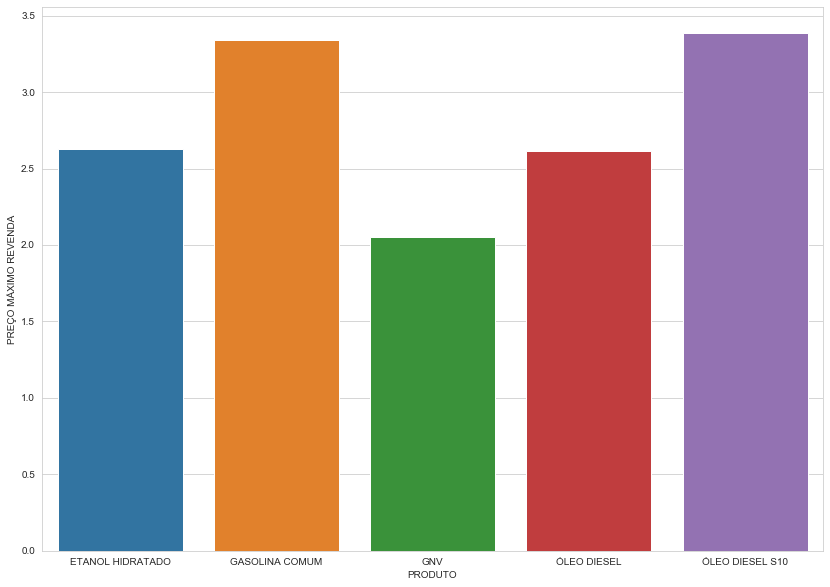

In [21]:
plt.figure(figsize=(14, 10))
sns.barplot(x = "PRODUTO", y = "PREÇO MÁXIMO REVENDA", data = combustivel, ci = None);

-  VARIAÇÃO POR PRODUTO

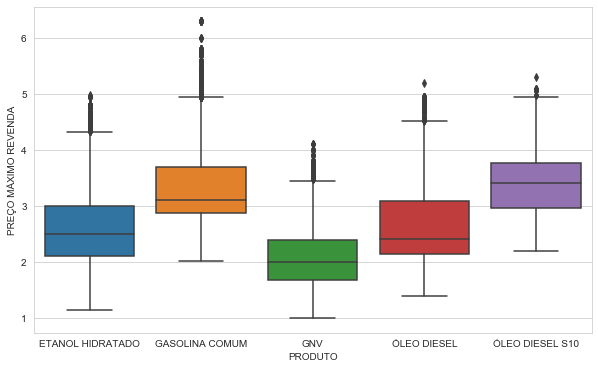

In [22]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "PRODUTO", y = "PREÇO MÁXIMO REVENDA", data = combustivel);

O Óleo Diesel S10 é, no geral, é o combustível em que se encontra com o maior valor, seguido de perto pela Gasolina Comum. Porém, como é possível observar nos boxplots, os preço de ambos são parecidos, tendo o Diesel S10 menos variações.

# Preço Mínimo dos Combustíveis

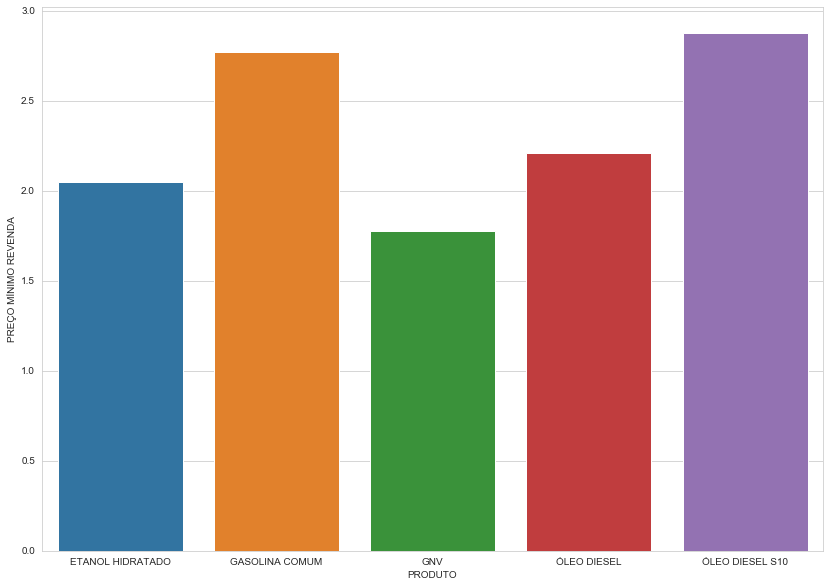

In [23]:
plt.figure(figsize=(14, 10))
sns.barplot(x = "PRODUTO", y = "PREÇO MÍNIMO REVENDA", data = combustivel, ci = None);

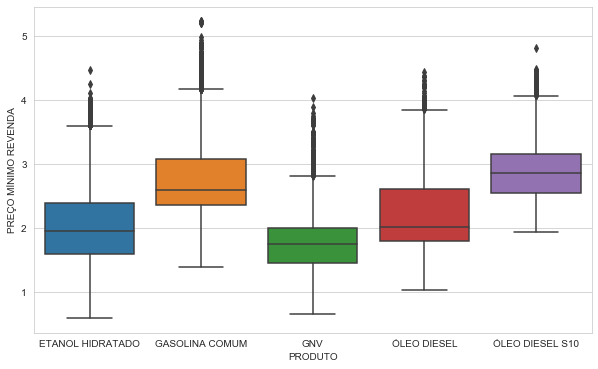

In [24]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "PRODUTO", y = "PREÇO MÍNIMO REVENDA", data = combustivel);

Enquanto que o GNV apresenta os menores valores na média. O Etanol também possui valores baixos, mas a variação do preço é bem mais alta que a do GNV, não o tornando os com menores preços.

# Preço Médio de Produtos por Macrorregião

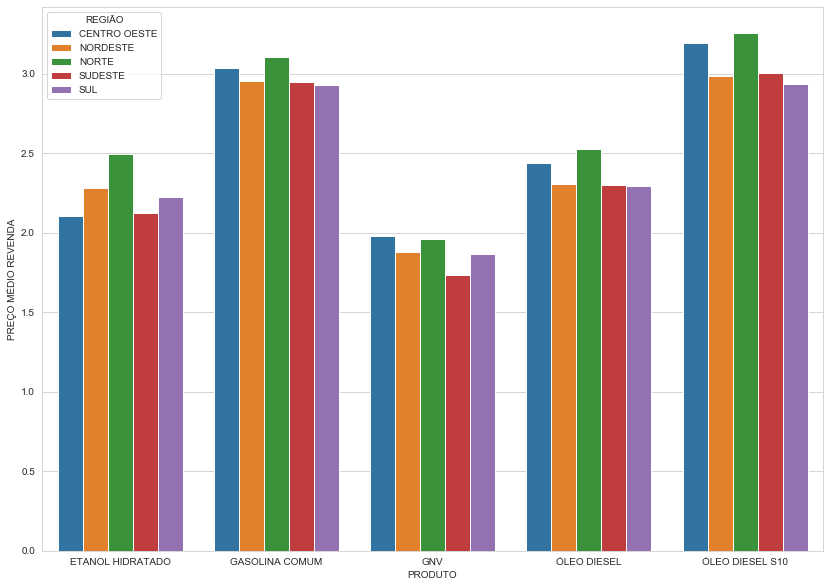

In [25]:
plt.figure(figsize=(14, 10))
sns.barplot(x = "PRODUTO", y = "PREÇO MÉDIO REVENDA", hue = "REGIÃO", data = combustivel, ci = None);

No geral, a região norte é a que apresenta maior preço nos combustíveis, tendo 4 dos 5 combustíveis analisados os mais caros durante o perído de 2004 a 2018. Ela apresenta, no geral, o Etanol, Gasolina, Diesel e Diesel S10 mais caros de todas as regiões. Enquanto que o Centro-Oeste apresenta o GNV mais caro de todos na média.

Porém, diferente da mais cara, não há uma região que se destaque por ter os combustíveis mais baratos. O Centro-Oeste tem o Etanol mais barato, o Sul tem a Gasolina e o Diesel S10 mais baratos e o Sudeste o GNV mais barato. Em relação ao Diesel, tanto o nordeste, sudeste e sul possuem um valor médio muito parecido.

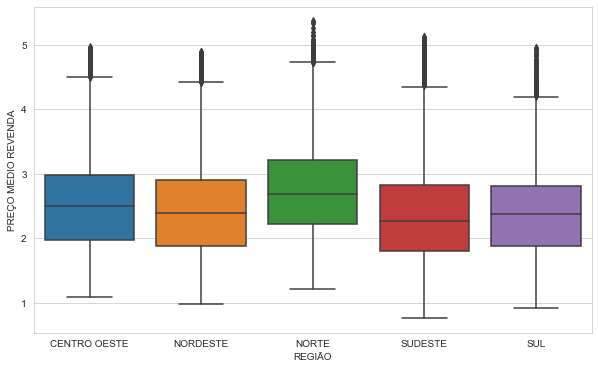

In [26]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "REGIÃO", y = "PREÇO MÉDIO REVENDA", data = combustivel);

Porém, apesar do descrito acima, a variação dos preços entre as regiões é parecido, snedo possível encotrar os combustíveis analisados por um preço baixo.

# Variação por Produto

Agora, analisaremos cada produto individualmente, para saber qual deste teve maior aumento no espaço de tempo analisado

In [27]:
mask_etanol = combustivel["PRODUTO"] == "ETANOL HIDRATADO"
mask_gasolina = combustivel["PRODUTO"] == "GASOLINA COMUM"
mask_gnv = combustivel["PRODUTO"] == "GNV"
mask_diesel = combustivel["PRODUTO"] == "ÓLEO DIESEL"
mask_s10 = combustivel["PRODUTO"] == "ÓLEO DIESEL S10"
#Foram criadas máscaras em que cada dataframe somente conterá um tipo de produto

In [28]:
dfmask_etanol = combustivel[mask_etanol]
dfmask_gasolina = combustivel[mask_gasolina]
dfmask_gnv = combustivel[mask_gnv]
dfmask_diesel = combustivel[mask_diesel]
dfmask_s10 = combustivel[mask_s10]

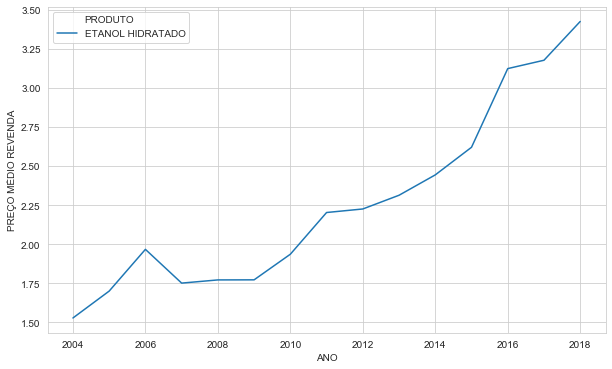

In [29]:
plt.figure(figsize = (10,6))
sns.lineplot(x = "ANO", y = "PREÇO MÉDIO REVENDA", hue = "PRODUTO", data = dfmask_etanol, ci = None);

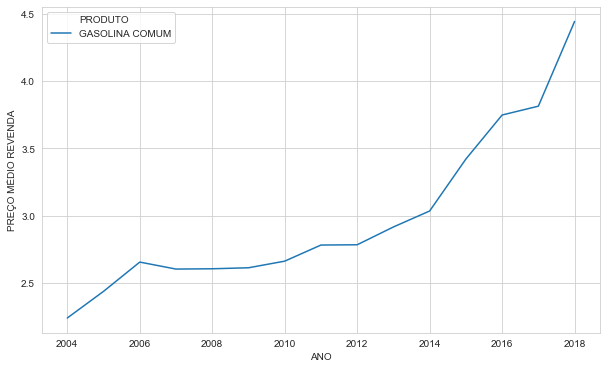

In [30]:
plt.figure(figsize = (10,6))
sns.lineplot(x = "ANO", y = "PREÇO MÉDIO REVENDA", hue = "PRODUTO", data = dfmask_gasolina, ci = None);

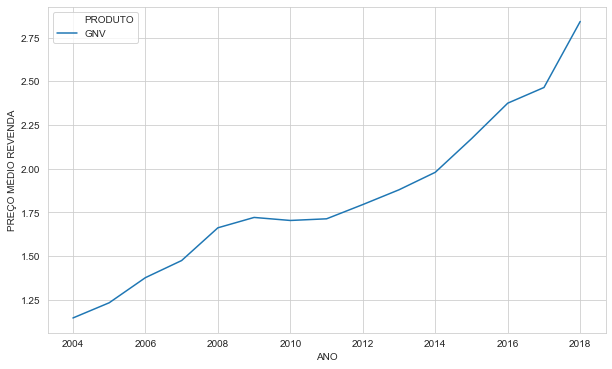

In [31]:
plt.figure(figsize = (10,6))
sns.lineplot(x = "ANO", y = "PREÇO MÉDIO REVENDA", hue = "PRODUTO", data = dfmask_gnv, ci = None);

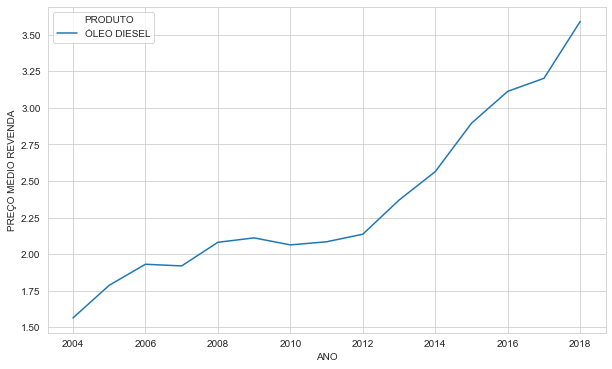

In [32]:
plt.figure(figsize = (10,6))
sns.lineplot(x = "ANO", y = "PREÇO MÉDIO REVENDA", hue = "PRODUTO", data = dfmask_diesel, ci = None);

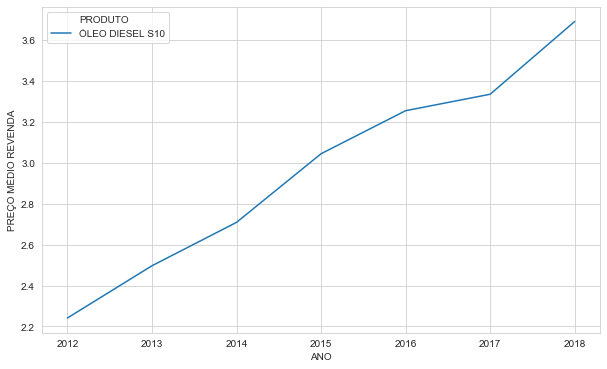

In [33]:
plt.figure(figsize = (10,6))
sns.lineplot(x = "ANO", y = "PREÇO MÉDIO REVENDA", hue = "PRODUTO", data = dfmask_s10, ci = None);

In [34]:
print(dfmask_etanol["PREÇO MÉDIO REVENDA"].max() - dfmask_etanol["PREÇO MÉDIO REVENDA"].min(),
dfmask_gasolina["PREÇO MÉDIO REVENDA"].max() - dfmask_gasolina["PREÇO MÉDIO REVENDA"].min(),
dfmask_gnv["PREÇO MÉDIO REVENDA"].max() - dfmask_gnv["PREÇO MÉDIO REVENDA"].min(),
dfmask_diesel["PREÇO MÉDIO REVENDA"].max() - dfmask_diesel["PREÇO MÉDIO REVENDA"].min(),
dfmask_s10["PREÇO MÉDIO REVENDA"].max() - dfmask_s10["PREÇO MÉDIO REVENDA"].min())

3.6929999999999996 3.474 3.0449999999999995 3.461 2.748


Com os gráficos e o código acima, é possível observar que o combustível com maior variação dentro deste tempo foi o Etanol Hidratado.

# Conclusões

Desta forma, podemos concluir que:
- o anúncio do descobrimento do pré-sal pode ter reduzido o preço dos combustíveis fósseis no ano de 2007 no Brasil, apesar do preço dos combustíveis ser determinado por vários fatores nacionais e internacionais;
- o Etanol Hidratado é, em média, mais caro na região Norte e mais barato na região Centro-Oeste;
- a Gasolina Comum é, em média, mais cara na região Norte e mais barata na região Sul;
- o GNV é mais caro na região Centro-Oeste e mais barato na região Sudeste;
- o Óleo Diesel e mais caro na região Norte e mais barato nas regiões nordeste, sudeste e sul;
- o Óleo Diesel S10 é mais caro na região Norte e mais barato na rgião Sul;
- o combustível que sofreu o maior aumento no tempo analisado foi a Gasolina Comum.